# Phenotypic and molecular identification of pathogenic bacteria from cultured Amazonian fish

This *Python Notebook* contains the applied scripts organized to enhance the reprodutibily for the performed experiments in this work.

In [151]:
from Bio import SeqIO
from Bio.Blast.Applications import *

from pathlib import Path
import pathlib
import glob

import re
import os
import math
from hashlib import sha256, sha1

import pylab as plt
import matplotlib.patches as patches
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## 01 - Handling the sequenced raw files

### Converting the *.abi* files to *.fastq* files

It reads all the *.abi* files from each lane and convert them to *.fastq* files using Biopython version 1.79 (Chapman and Chang, 2000).

* Chapman, Brad, and Chang, Jeffrey. Biopython: Python tools for computational biology. ACM Sigbio Newsletter 20.2 (2000): 15-19, https://dl.acm.org/doi/abs/10.1145/360262.360268

<hr style="border:2px solid gray"> </hr>
Raw data path object

In [160]:
rawDataPath = Path().resolve().joinpath('01_raw_data/')

In [161]:
rawDataPath.as_posix()

'/home/waldeyr/GoogleDrive/projeto_peixes_Eliane/manuscrito/manuscript_peixes/workspace/01_raw_data'

<hr style="border:2px solid gray"> </hr>
Get *.fastq* files from lane 01

In [162]:
lane01List = Path().resolve().glob('01_raw_data/lane01/*.ab1')
targetPath = rawDataPath.as_posix() + '/fastq01_to_rename/'
Path(targetPath).mkdir(parents=True, exist_ok=True)
for path in lane01List:
    sourceSequence = SeqIO.parse(path.as_posix(), "abi")
    targetFile = targetPath + path.stem + '.fastq' 
    SeqIO.write(sourceSequence, targetFile, "fastq")

<hr style="border:2px solid gray"> </hr>
Get *.fastq* files from lane 02

In [163]:
lane02List = Path().resolve().glob('01_raw_data/lane02/*.ab1')
targetPath = rawDataPath.as_posix() + '/fastq02_to_rename/'
Path(targetPath).mkdir(parents=True, exist_ok=True)
for path in lane02List:
    sourceSequence = SeqIO.parse(path.as_posix(), "abi")
    targetFile = targetPath + path.stem + '.fastq' 
    SeqIO.write(sourceSequence, targetFile, "fastq")

<hr style="border:2px solid gray"> </hr>
Get *.fastq* files from lane 03

In [164]:
lane03List = Path().resolve().glob('01_raw_data/lane03/*.ab1')
targetPath = rawDataPath.as_posix() + '/fastq03_to_rename/'
Path(targetPath).mkdir(parents=True, exist_ok=True)
for path in lane03List:
    sourceSequence = SeqIO.parse(path.as_posix(), "abi")
    targetFile = targetPath + path.stem + '.fastq' 
    SeqIO.write(sourceSequence, targetFile, "fastq")

<hr style="border:2px solid gray"> </hr>

### Strain names organization

It reads the converted fastq files and rename them according to a dataset representing the sequenced strain names (PPUFAM).

In [165]:
lane01 = pd.read_csv(rawDataPath.as_posix()+'/lane01.csv', header=0, index_col=0)  
lane02 = pd.read_csv(rawDataPath.as_posix()+'/lane02.csv', header=0, index_col=0)  
lane03 = pd.read_csv(rawDataPath.as_posix()+'/lane03.csv', header=0, index_col=0)  

In [166]:
lane01

,1,2,3,4,5,6,7,8,9,10,11,12
A,01F1,22F9,40F17,54F25,71F33,236F41,01R49,22R57,40R65,54R73,71R81,236R89
B,03F2,25F10,43F18,55F26,72F34,238F42,03R50,25R58,43R66,55R74,72R82,238R90
C,03F3,26F11,44F19,57F27,74F35,239F43,03R51,26R59,44R67,57R75,74R83,239R91
D,05F4,27F12,45F20,58F28,228F36,246F44,05R52,27R60,45R68,58R76,228R84,246R92
E,07F5,28F13,46F21,59F29,229F37,250F45,07R53,28R61,46R69,59R77,229R85,250R93
F,12F6,34F14,51F22,63F30,232F38,251F46,12R54,34R62,51R70,63R78,232R86,251R94
G,13F7,37F15,52F23,64F31,233F39,252F47,13R55,37R63,52R71,64R79,233R87,252R95
H,16F8,38F16,53F24,70F32,234F40,254F48,16R56,38R64,53R72,70R80,234R88,254R96


In [167]:
lane02

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,16F01,252F09,263F17,272F24,278F32,286F40,16R48,252R56,263R64,272R72,278R81,286R89
B,38F02,255F10,264F18,272F25,279F33,288F41,38R49,255R57,264R65,272R73,279R82,288R90
C,45F03,256F11,265F19,273F26,280F34,289F42,45R50,256R58,265R66,273R74,280R83,289R91
D,53F04,258F12,266F19,274F27,281F35,289F43,53R51,258R59,266R67,274R75,281R84,289R92
E,70F05,259F13,268F20,275F28,282F36,16F44,70R52,259R60,268R68,275R76,282R85,16R93
F,74F06,260F14,268F21,276F29,284F37,38F45,74R53,260R61,268R69,276R77,284R86,38R94
G,229F07,261F15,269F22,276F30,285F38,45F46,229R54,260R62,269R70,276R78,284R87,45R95
H,234F08,262F16,270F23,277F31,285F39,53F47,234R55,260R63,270R71,277R79,284R88,74R96


In [168]:
lane03

,1,2,3,4,5,6,7,8,9,10,11,12
A,5F01,53F09,252F17,272F25,284F33,38F41,5R49,53R57,252R65,272R73,284R81,38R89
B,16F02,70F10,252F18,272F26,285F34,45F42,16R50,70R58,252R66,272R74,285R82,45R90
C,16F03,70F11,255F19,273F27,285F35,45F43,16R51,70R59,255R67,273R75,285R83,45R91
D,38F04,74F12,256F20,274F28,286F36,53F44,38R52,74R60,256R68,274R76,286R84,53R92
E,38F05,74F13,258F21,277F29,5F37,53F45,38R53,74R61,258R69,277R77,5R85,53R93
F,45F06,229F14,260F22,278F30,16F38,70F46,45R54,229R62,260R70,278R78,16R86,70R94
G,45F07,229F15,265F23,279F31,16F39,70F47,45R55,229R63,265R71,279R79,16R87,70R95
H,53F08,234F16,266F24,282F32,38F40,74F48,53R56,234R64,266R72,282R80,38R88,74R96


<hr style="border:2px solid gray"> </hr>
Renaming plate samples in the lanes to their rescpective strain names: *PPUFAM_999*

In [169]:
def renameFastqSequences( laneFastqList, laneDataframe, pathForResults ):
    Path(pathForResults).mkdir(parents=True, exist_ok=True)
    for fastqFile in laneFastqList:
        i, j = fastqFile.stem.split("_")[1][:1], int(fastqFile.stem.split("_")[1][1:])
        cell = laneDataframe.loc[str(i),str(j)]
        # .fastq file content identified by pool numbers and F (forward) or R (reverse) strands
        record = SeqIO.read(fastqFile, "fastq")
        if "F" in cell:
            ppufamNumber = re.split("F", cell)[0].zfill(3).strip()
            poolNumber   = re.split("F", cell)[1].zfill(2).strip()
            formatedCell = ppufamNumber+"F"+poolNumber.strip()
            fileName = "PPUFAM_" + ppufamNumber + "_forward_" + formatedCell + "_" + sha1(str(formatedCell+record.seq).encode()).hexdigest()[:5]        
        if "R" in cell:
            ppufamNumber = re.split("R", cell)[0].zfill(3).strip()
            poolNumber   = re.split("R", cell)[1].zfill(2).strip()
            formatedCell = str(ppufamNumber+"R"+poolNumber).strip()
            fileName = "PPUFAM_" + ppufamNumber + "_reverse_" + formatedCell + "_" + sha1(str(formatedCell+record.seq).encode()).hexdigest()[:5]    
        #fastq file new properties
        record.id = fileName
        record.name = fileName
        record.description = "Phenotypic and molecular identification of pathogenic bacteria from cultured Amazonian fish"
        SeqIO.write(record, pathForResults + fileName + ".fastq", "fastq")

In [170]:
lane01FastqList = Path().resolve().glob('01_raw_data/fastq01_to_rename/*.fastq')
renameFastqSequences(lane01FastqList, lane01, "01_raw_data/fastq_files_renamed/")

In [171]:
lane02FastqList = Path().resolve().glob('01_raw_data/fastq02_to_rename/*.fastq')
renameFastqSequences(lane02FastqList, lane02, "01_raw_data/fastq_files_renamed/")

In [172]:
lane03FastqList = Path().resolve().glob('01_raw_data/fastq03_to_rename/*.fastq')
renameFastqSequences(lane03FastqList, lane03, "01_raw_data/fastq_files_renamed/")

### Filtering

It filters all fastq files by quality using fastp version fastp.0.23.2.1 (Chan et al. 2018).


* Shifu Chen, Yanqing Zhou, Yaru Chen, Jia Gu; fastp: an ultra-fast all-in-one FASTQ preprocessor, Bioinformatics, Volume 34, Issue 17, 1 September 2018, Pages i884–i890, https://doi.org/10.1093/bioinformatics/bty560

<hr style="border:2px solid gray"> </hr>
Download and install fastp fastp.0.23.1

In [203]:
os.system("wget http://opengene.org/fastp/fastp.0.23.1")
os.system("mv fastp.0.23.1 fastp")
os.system("chmod a+x ./fastp")

0

<hr style="border:2px solid gray"> </hr>
Evaluating the reads size distribution

Reference: 
* Pruesse E, Quast C, Knittel K, et al. SILVA: a comprehensive online resource for quality checked and aligned ribosomal RNA sequence data compatible with ARB. Nucleic Acids Res. 2007;35(21):7188-7196. doi:10.1093/nar/gkm864
* Clarridge JE 3rd. Impact of 16S rRNA gene sequence analysis for identification of bacteria on clinical microbiology and infectious diseases. Clin Microbiol Rev. 2004;17(4):840-862. doi:10.1128/CMR.17.4.840-862.2004

In [173]:
os.system("cd 01_raw_data/fastq_files_renamed/")
os.system("find -name 'PPUFAM*' -size 0 -delete")
os.system("cat *.fastq > ../all.fastq")
os.system("cat ../all.fastq | awk '{if(NR%4==2) print length($1)}' | sort -n | uniq -c > ../read_length.txt")
os.system("cd ../../")

0

In [174]:
f = np.loadtxt('01_raw_data/read_length.txt', unpack='False')
number_of_sequences = f[0]
size_of_sequences    = f[1]
df = pd.DataFrame(dict(number_of_sequences=number_of_sequences, size_of_sequences=size_of_sequences))
df = df[df.size_of_sequences > 10]

Text(0.5, 0, 'Size of sequences')

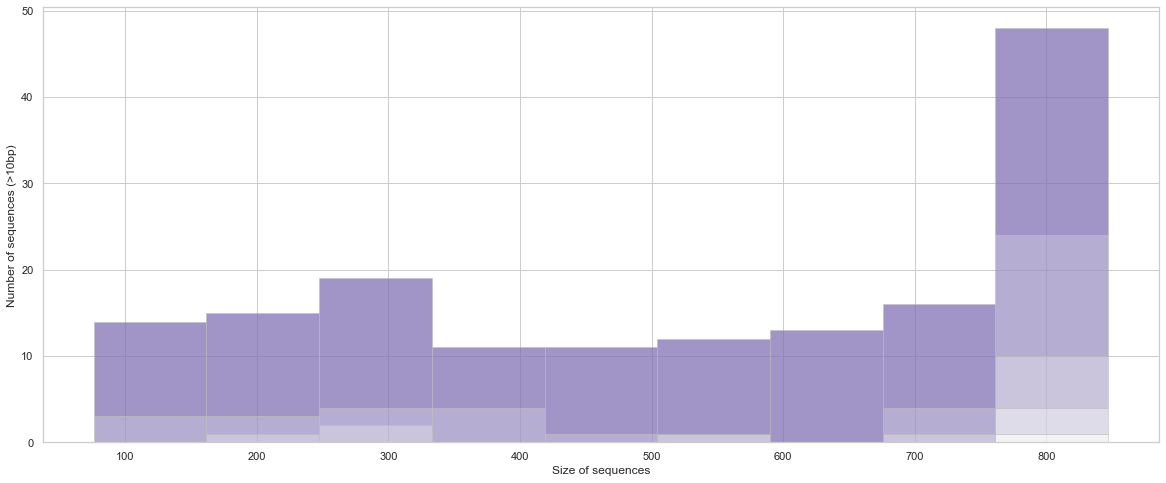

In [175]:
sns.histplot(
    df,
    x="size_of_sequences", 
    hue="number_of_sequences", 
    hue_order="size_of_sequences",
    legend = False,
    multiple="stack",
    palette="light:m_r",
    edgecolor=".75",
    linewidth=.5
)
plt.ylabel('Number of sequences (>10bp)')
plt.xlabel('Size of sequences')

<hr style="border:2px solid gray"> </hr>
Filtering reads by size and quality

In [176]:
fastqList = Path().resolve().glob('01_raw_data/fastq_files_renamed/*.fastq')
pathForResults = str(Path().resolve())+"/02_filtered_reads/"
Path(pathForResults).mkdir(parents=True, exist_ok=True)

# Filter files using fastp
for fastqFile in fastqList:
    record = SeqIO.read(fastqFile, "fastq")
    if len(record.seq) >= 300: # following above evaluation, before quality filter
        cmd = f"./fastp \
            --in1  {fastqFile} \
            --out1 {pathForResults}{fastqFile.stem}_filtered.fastq \
            --cut_by_quality5 \
            --cut_by_quality3 \
            --qualified_quality_phred 20 \
            --length_required 300" # following above evaluation, after quality filter
        os.system(cmd)
        
# Delete files with no data (Sanger sequencing fails)
os.system("cd 02_filtered_reads/ && find -name 'PPUFAM*' -size 0 -delete && cd ../")
        
# remove unecessary_files        
os.system("rm fastp.html fastp.json")

0

<hr style="border:2px solid gray"> </hr>
Results after filtering

In [177]:
finalFastqList = Path().resolve().glob('02_filtered_reads/*.fastq')
print(f"Final number of surviving reads after filtering to annotate: {len(list(finalFastqList))}")

Final number of surviving reads after filtering to annotate: 142


### Sequence annotation

<hr style="border:2px solid gray"> </hr>
NCBI 16SrRNA Blast database is already downloaded in the folder nicbi_16S_rRNA

it is required to download the Blast database for 16S rRNA from NCBI by running: 

**./update_nbi_16S_rRNA_blast_database.sh**

<hr style="border:2px solid gray"> </hr>
Folder for Blast data

In [178]:
pathForBlastResults = str(Path().resolve())+"/03_blast/"
Path(pathForBlastResults).mkdir(parents=True, exist_ok=True)

<hr style="border:2px solid gray"> </hr>
Convert filtered fastq files to fasta files

In [146]:
def convertFastqToFasta( sourceList ):
    filtered_fasta_sequences = str(Path().resolve())+"/03_blast/fasta/"
    Path(filtered_fasta_sequences).mkdir(parents=True, exist_ok=True)
    for fastqFile in sourceList:
        SeqIO.write(SeqIO.parse(fastqFile, "fastq"), filtered_fasta_sequences+fastqFile.stem+".fasta", "fasta")

In [147]:
filteredReadsList = Path().resolve().glob('02_filtered_reads/*.fastq')
convertFastqToFasta( filteredReadsList )

<hr style="border:2px solid gray"> </hr>
Running Blast alignment: NCBI 16SrRNA against fasta files

In [185]:
def runBlast(fastaFilePath, blastDbPath, resultsPath):
    fasta_files = pathlib.Path(fastaFilePath).glob("*.fasta") # lista arquivos .fasta da pasta
    for fasta_file in fasta_files:
        E_VALUE_THRESH = 0.00001 
        result_file = resultsPath + fasta_file.stem + ".blast.tab"
        blastn_cline = NcbiblastnCommandline(
                query    = str(fasta_file), 
                db       = blastDbPath + "/16S_ribosomal_RNA", 
                evalue   = E_VALUE_THRESH,# e-bvalue
                num_threads = 4,
                max_hsps = 1,
                perc_identity = 96, # minimum % of identity
                outfmt   = "6 qseqid sseqid pident length mismatch gapopen \
                qstart qend sstart send evalue bitscore staxids sscinames scomnames stitle",
                out      = result_file
        )
        stdout, stderr = blastn_cline()
# qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue \
# bitscore staxids sscinames scomnames stitle        

<hr style="border:2px solid gray"> </hr>
Folder for Blast results

In [ ]:
pathForBlastResults = str(Path().resolve())+"/03_blast/results"
Path(pathForBlastResults).mkdir(parents=True, exist_ok=True)

In [184]:
ncbi_16S_rRNA            = str(Path().resolve())+"/ncbi_16S_rRNA"
filtered_fasta_sequences = str(Path().resolve())+"/03_blast/fasta/"
pathForBlastResults      = str(Path().resolve())+"/03_blast/results/"

runBlast(filtered_fasta_sequences, ncbi_16S_rRNA, pathForBlastResults)

In [186]:
def checkResultFiles(folder):
    files = pathlib.Path(folder).glob("*.tab")
    for file in files:
        if os.path.getsize(str(file)) == 0:# Is there any void alignment ?
            os.remove(str(file)) # remove

In [187]:
checkResultFiles(pathForBlastResults)

<hr style="border:2px solid gray"> </hr>

Join best results in a single file

In [188]:
os.system("cd 03_blast/results/ && grep -m 1 '.' *.tab >../../ppufam_annotation.tab && cd ../")

0

### Processing PPUFAM annotated sequences

In [189]:
# ppufam = pd.read_csv('ppufam_annotation.tab', sep="\t", header=None) 
# ppufam.columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore', 'staxids', 'sscinames', 'scomnames', 'stitle']

<hr style="border:2px solid gray"> </hr>

Create a column to mark repeated strains and strand (forward or reverse)

In [190]:
# def createColumnTomarkForwardAndReverse( row ):
#     parts = row['qseqid'].split("_")
#     return parts[0]+"_"+parts[1], parts[2]

In [191]:
# ppufam[["strain", "strand"]] = ppufam.apply(lambda row: createColumnTomarkForwardAndReverse(row), axis=1, result_type='expand')

In [1]:
# ppufam[["strain", "strand","pident","sscinames"]]

In [193]:
# ppufam = ppufam.sort_values('pident', ascending=False).drop_duplicates(['strain'])

In [53]:
# ppufam = ppufam_final_dataset.loc[ppufam_final_dataset['pident'] >= 96]

In [2]:
# print(f"Final filtered samples: {ppufam.shape[0]}")

**Filter annotated ppufam sequences by species level: 16SrRNA identity >= 98%**

Acording to an understood agreement among these references: 

* Taxonomic Note: A Place for DNA-DNA Reassociation and 16s rRNA Sequence Analysis in the Present Species Definition in Bacteriology
* Guidelines for interpretation of 16S rRNA gene sequence-based results for identification of medically important aerobic Gram-positive bacteria
* Status of the Microbial Census

In [195]:
# ppufam_species = ppufam.loc[ppufam['pident'] >= 98]

In [3]:
# ppufam_species.shape[0] # 44 species

In [197]:
# ppufam_genus = ppufam.loc[ppufam['pident'] < 98]

In [4]:
# ppufam_genus.shape[0] # 22 species

### Assign fish species and Gram staining to the dataset

#### TODO: Pegar as listas com Eliane e fazer completo

In [ ]:
# molecular_table = pd.read_csv('MolecularTable.tsv', sep="\t") 

In [6]:
# molecular_table.sample(n=3)

In [ ]:
# def getFishSpeciesVersusStrain( row ):
#     list_fish = []
#     list_strain = []
#     fish    = row['Source']
#     strains = row['PPUFAM'].split(",")
#     for strain in strains:
#         list_fish.append(fish)
#         list_strain.append('PPUFAM_'+strain)
#     return list_fish, list_strain

In [ ]:
# rel = molecular_table.apply(lambda row: getFishSpeciesVersusStrain(row), axis = 1)

In [ ]:
# rel_list = []
# for r in rel:
#     for s in r[1]:
#         rel_list.append([s, r[0][0]])
        
# rel_list[:3]

In [ ]:
# ppufam_final_dataset

In [ ]:
# rel_df = pd.DataFrame(rel_list, columns = ['strain', 'fish'])

In [ ]:
# rel_df.head()

In [ ]:
# result = pd.merge(ppufam_final_dataset, rel_df, how="left", on=["strain", "strain"])

In [ ]:
# result

In [ ]:
#! pip install seaborn

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

In [ ]:
# sns.set_theme(style="ticks")

# g = sns.relplot(data=result,
#             x="bitscore", 
#             y="pident",
#             size="length",
#             hue="strand", 
#             sizes=(40, 400), 
#             alpha=.5, 
#             palette="muted",
#             height=6
#             )
# g._legend.remove()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# # new_labels = ['Strand', 'Sequence length']
# # for t, l in zip(g._legend.texts, new_labels):
# #     t.set_text(l)
# plt.ylabel('% of identity')
# plt.xlabel('Alignment score')